In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
cab_db = pd.read_csv('Cab_Data.csv')
city_db = pd.read_csv('City.csv')
customer_db = pd.read_csv('Customer_ID.csv')
transaction_db = pd.read_csv('Transaction_ID.csv')


In [3]:
cab_db.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
city_db.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [5]:
customer_db.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [6]:
transaction_db.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [7]:
cab_tran = pd.merge(cab_db, transaction_db, how='left', on='Transaction ID')
cab_tran.head(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card
5,10000016,42376,Pink Cab,ATLANTA GA,6.06,72.43,63.024,27318,Cash
6,10000017,42372,Pink Cab,AUSTIN TX,44.00,576.15,475.200,33788,Card
7,10000018,42376,Pink Cab,AUSTIN TX,35.65,466.10,377.890,34106,Card
8,10000019,42381,Pink Cab,BOSTON MA,14.40,191.61,146.880,59799,Cash
9,10000020,42375,Pink Cab,BOSTON MA,10.89,156.98,113.256,57982,Cash


In [8]:
cab_merged = pd.merge(cab_tran, customer_db, how='left', on='Customer ID')
cab_merged.head(10)
print(cab_merged.describe())
print(cab_merged.info())

       Transaction ID  Date of Travel   KM Travelled  Price Charged  \
count    3.593920e+05   359392.000000  359392.000000  359392.000000   
mean     1.022076e+07    42964.067998      22.567254     423.443311   
std      1.268058e+05      307.467197      12.233526     274.378911   
min      1.000001e+07    42371.000000       1.900000      15.600000   
25%      1.011081e+07    42697.000000      12.000000     206.437500   
50%      1.022104e+07    42988.000000      22.440000     386.360000   
75%      1.033094e+07    43232.000000      32.960000     583.660000   
max      1.044011e+07    43465.000000      48.000000    2048.030000   

        Cost of Trip    Customer ID            Age  Income (USD/Month)  
count  359392.000000  359392.000000  359392.000000       359392.000000  
mean      286.190113   19191.652115      35.336705        15048.822937  
std       157.993661   21012.412463      12.594234         7969.409482  
min        19.000000       1.000000      18.000000         2000.0000

In [9]:
from datetime import date, timedelta, datetime

cab_merged['Year'] = cab_merged['Date of Travel'].apply(lambda x: (date(1900, 1, 1) + timedelta(x)).strftime("%Y"))
cab_merged['Date of Travel'] = cab_merged['Date of Travel'].apply(lambda x: (date(1900, 1, 1) + timedelta(x)).strftime("%Y-%m-%d"))

col = cab_merged['Year']
cab_merged.drop(labels=['Year'], axis=1, inplace = True)
cab_merged.insert(2, 'Year', col)


cab_merged.head()

,Transaction ID,Date of Travel,Year,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-10,2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813
1,10000012,2016-01-08,2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237
2,10000013,2016-01-04,2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242
3,10000014,2016-01-09,2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327
4,10000015,2016-01-05,2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536


In [10]:
profit = cab_merged['Price Charged'] - cab_merged['Cost of Trip']

cab_merged.insert(7, 'Profit', profit)

cab_merged.head()

,Transaction ID,Date of Travel,Year,Company,City,KM Travelled,Price Charged,Profit,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-10,2016,Pink Cab,ATLANTA GA,30.45,370.95,57.315,313.635,29290,Card,Male,28,10813
1,10000012,2016-01-08,2016,Pink Cab,ATLANTA GA,28.62,358.52,23.666,334.854,27703,Card,Male,27,9237
2,10000013,2016-01-04,2016,Pink Cab,ATLANTA GA,9.04,125.20,27.568,97.632,28712,Cash,Male,53,11242
3,10000014,2016-01-09,2016,Pink Cab,ATLANTA GA,33.17,377.40,25.798,351.602,28020,Cash,Male,23,23327
4,10000015,2016-01-05,2016,Pink Cab,ATLANTA GA,8.73,114.62,16.844,97.776,27182,Card,Male,33,8536


In [11]:
pink = cab_merged[cab_merged.Company == 'Pink Cab']
yellow = cab_merged[cab_merged.Company == 'Yellow Cab']

pink_c = '#9000a6'

In [21]:
import plotly.graph_objects as go

pink_2016 = round(pink[pink['Date of Travel'].str.contains(r"\b2016\b", regex=True)].Profit.sum(), 2)
pink_2017 = round(pink[pink['Date of Travel'].str.contains(r"\b2017\b", regex=True)].Profit.sum(), 2)
pink_2018 = round(pink[pink['Date of Travel'].str.contains(r"\b2018\b", regex=True)].Profit.sum(), 2)
pink_avg = round(((pink_2016 + pink_2017 + pink_2018) / 3), 2)

yellow_2016 = round(yellow[yellow['Date of Travel'].str.contains(r"\b2016\b", regex=True)].Profit.sum(), 2)
yellow_2017 = round(yellow[yellow['Date of Travel'].str.contains(r"\b2017\b", regex=True)].Profit.sum(), 2)
yellow_2018 = round(yellow[yellow['Date of Travel'].str.contains(r"\b2018\b", regex=True)].Profit.sum(), 2)
yellow_avg = round(((yellow_2016 + yellow_2017 + yellow_2018) / 3), 2)

colors = ['pink', 'yellow']

fig = go.Figure(data=[go.Table(header=dict(values=['Company', '2016', '2017', '2018', 'Average']),
                 cells=dict( values=[['Pink Cab', 'Yellow Cab'], 
                                    [pink_2016, yellow_2016],
                                   [pink_2017, yellow_2017],
                                   [pink_2018, yellow_2018],
                                   [pink_avg, yellow_avg]]))])
fig.show()

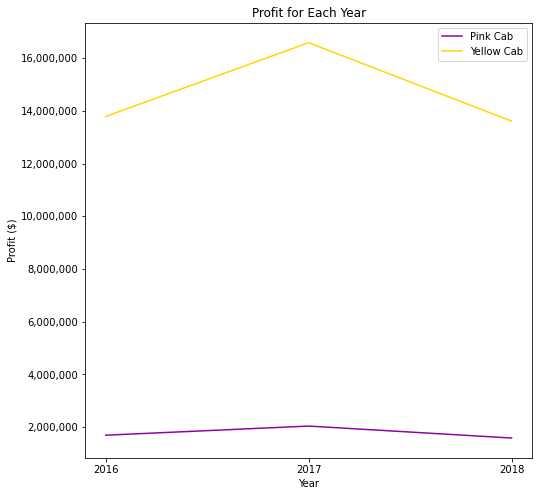

<Figure size 432x288 with 0 Axes>

In [13]:
pink_profit = [pink_2016, pink_2017, pink_2018]
yellow_profit = [yellow_2016, yellow_2017, yellow_2018]
years = [2016, 2017, 2018]

fig = plt.figure(figsize=(8, 8))
ax = plt.subplot()
plt.plot(years, pink_profit, color=pink_c, label='Pink Cab')
plt.plot(years, yellow_profit, color='gold', label = 'Yellow Cab')
ax.set_xticks(years)
ax.ticklabel_format(style='plain')
plt.title('Profit for Each Year')
plt.xlabel('Year')
plt.ylabel('Profit ($)')
plt.legend()
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()
plt.clf()

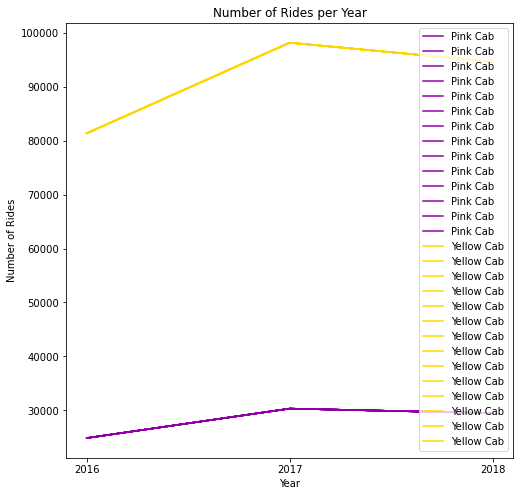

In [14]:
yellow_rides_2016 = yellow[yellow['Date of Travel'].str.contains(r"\b2016\b", regex=True)].count()
yellow_rides_2017 = yellow[yellow['Date of Travel'].str.contains(r"\b2017\b", regex=True)].count()
yellow_rides_2018 = yellow[yellow['Date of Travel'].str.contains(r"\b2018\b", regex=True)].count()
yellow_rides_full = [yellow_rides_2016, yellow_rides_2017, yellow_rides_2018]

pink_rides_2016 = pink[pink['Date of Travel'].str.contains(r"\b2016\b", regex=True)].count()
pink_rides_2017 = pink[pink['Date of Travel'].str.contains(r"\b2017\b", regex=True)].count()
pink_rides_2018 = pink[pink['Date of Travel'].str.contains(r"\b2018\b", regex=True)].count()
pink_rides_full = [pink_rides_2016, pink_rides_2017, pink_rides_2018]

fig = plt.figure(figsize=(8, 8))
ax = plt.subplot()
plt.plot(years, pink_rides_full, color=pink_c, label='Pink Cab')
plt.plot(years, yellow_rides_full, color='gold', label='Yellow Cab')
plt.legend()
plt.title('Number of Rides per Year')
plt.ylabel('Number of Rides')
plt.xlabel('Year')
ax.set_xticks(years)


plt.show()

[]

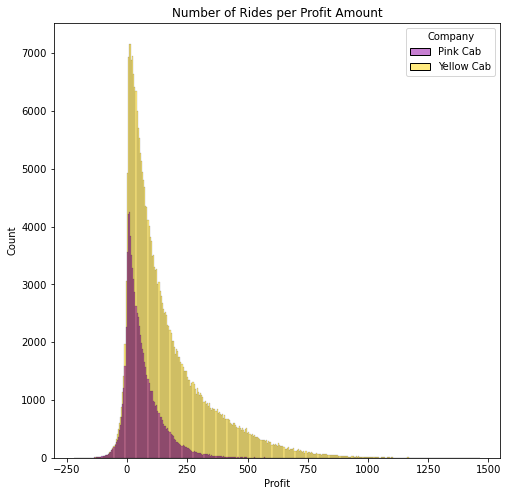

In [15]:
colors = [pink_c, 'gold']
custom_palette = sns.set_palette(sns.color_palette(colors))

fig = plt.figure(figsize=(8, 8))
sns.histplot(data=cab_merged, x='Profit', hue='Company', alpha=0.5, palette=custom_palette)
plt.title('Number of Rides per Profit Amount')


plt.plot()

[]

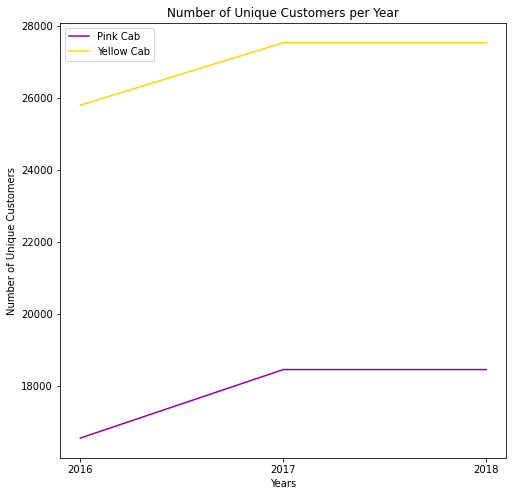

In [35]:
pink_users_2016 = pink[pink.Year == '2016']['Customer ID'].nunique()
pink_users_2017 = pink[pink.Year == '2017']['Customer ID'].nunique()
pink_users_2018 = pink[pink.Year == '2018']['Customer ID'].nunique()
pink_users = [pink_users_2016, pink_users_2018, pink_users_2018]

yellow_users_2016 = yellow[yellow.Year == '2016']['Customer ID'].nunique()
yellow_users_2yellow017 = yellow[yellow.Year == '2017']['Customer ID'].nunique()
yellow_users_2018 = yellow[yellow.Year == '2018']['Customer ID'].nunique()
yellow_users = [yellow_users_2016, yellow_users_2018, yellow_users_2018]

fig = plt.figure(figsize=(8, 8))
ax = plt.subplot()
sns.lineplot(x=years, y=pink_users, color=pink_c, label='Pink Cab')
sns.lineplot(x=years, y=yellow_users, color='gold', label='Yellow Cab')
plt.title('Number of Unique Customers per Year')
plt.xlabel('Years')
plt.ylabel('Number of Unique Customers')
ax.set_xticks(years)

plt.plot()